
# Домашнє завдання: Інтеграція Python та SQL: запити даних

Це ДЗ передбачене під виконання на локальній машині. Виконання з Google Colab буде суттєво ускладнене.

## Підготовка
1. Переконайтесь, що у вас встановлены необхідні бібліотеки:
   ```bash
   pip install sqlalchemy pymysql pandas matplotlib seaborn python-dotenv
   ```

2. Створіть файл `.env` з параметрами підключення до бази даних classicmodels. Базу даних ви можете отримати через

  - docker-контейнер згідно існтрукції в [документі](https://www.notion.so/hannapylieva/Docker-1eb94835849480c9b2e7f5dc22ee4df9), також відео інструкції присутні на платформі - уроки "MySQL бази, клієнт для роботи з БД, Docker і ChatGPT для запитів" та "Як встановити Docker для роботи з базами даних без терміналу"
  - або встановивши локально цю БД - для цього перегляньте урок "Опціонально. Встановлення MySQL та  БД Сlassicmodels локально".
  
  Приклад `.env` файлу ми створювали в лекції. Ось його обовʼязкове наповнення:
    ```
    DB_HOST=your_host
    DB_PORT=3306 або 3307 - той, який Ви налаштували
    DB_USER=your_username
    DB_PASSWORD=your_password
    DB_NAME=classicmodels
    ```
  Якщо ви створили цей файл під час перегляду лекції - **новий створювати не треба**. Замініть лише назву БД, або пропишіть назву в коді створення підключення (замість отримання назви цільової БД зі змінних оточення). Але переконайтесь, що до `.env` файл лежить в тій самій папці, що і цей ноутбук.

  **УВАГА!** НЕ копіюйте скрит для **створення** `.env` файлу. В лекції він наводиться для прикладу. І давалось пояснення, що в реальних проєктах ми НІКОЛИ не пишемо доступи до бази в коді. Копіювання скрипта для створення `.env` файлу сюди в ДЗ буде вважатись грубою помилкою і ми зніматимемо бали.

3. Налаштуйте підключення через SQLAlchemy до БД за прикладом в лекції.

Рекомендую вивести (відобразити) змінну engine після створення. Вона має бути не None! Якщо None - значить у Вас не підтягнулись налаштування з .env файла.

Ви також можете налаштувати параметри підключення до БД без .env файла, просто прописавши текстом в відповідних місцях. Це - не рекомендований підхід.


### Завдання 1: Простий запит (1 бал)

Ми працюємо з БД Classicmodels.

**Виведіть інформацію про продукти на складі** з наступними полями:
- назва продукту (productName)
- лінійка продукту (productLine)
- кількість на складі (quantityInStock)
- ціна закупки (buyPrice)

Зчитайте дані з БД з допомогою `pd.read_sql()` з SQLAlchemy engine, який ви створили на етапі підготовки.

Виведіть перші 10 продуктів, відсортованих за кількістю на складі (від більшої кількості до меншої).

In [4]:
request_1 = """
SELECT 
    productName, 
    productLine, 
    quantityInStock, 
    buyPrice
FROM products
ORDER BY quantityInStock DESC
LIMIT 10;
"""
df_10_top_stock = pd.read_sql(request_1, con=engine)

df_10_top_stock

,productName,productLine,quantityInStock,buyPrice
0,2002 Suzuki XREO,Motorcycles,9997,66.27
1,1995 Honda Civic,Classic Cars,9772,93.89
2,America West Airlines B757-200,Planes,9653,68.80
3,2002 Chevy Corvette,Classic Cars,9446,62.11
4,1932 Model A Ford J-Coupe,Vintage Cars,9354,58.48
5,1982 Ducati 996 R,Motorcycles,9241,24.14
6,1912 Ford Model T Delivery Wagon,Vintage Cars,9173,46.91
7,1976 Ford Gran Torino,Classic Cars,9127,73.49
8,1968 Dodge Charger,Classic Cars,9123,75.16
9,1965 Aston Martin DB5,Classic Cars,9042,65.96



### Завдання 2: Аналітика замовлень за 2004 рік (3 бали)

**Виведіть детальну інформацію про замовлення за 2004 рік** з наступними полями:
- Номер замовлення (orderNumber)
- Дата замовлення (orderDate)
- Статус замовлення (status)
- Ім'я клієнта (customerName)
- Країна клієнта (country)
- Загальна сума замовлення (сума всіх orderdetails.quantityOrdered * orderdetails.priceEach)

Використайте JOIN для об'єднання таблиць orders, customers, orderdetails. Додайте параметризацію за роком (тільки замовлення за 2004 рік).

Використайте `text()` та named parameters для формування запиту з SQLAlchemy.

Після отримання даних з БД проведіть обчислення з Python та напишіть висновки:
1. Побудуйте стовпчасту діаграму суми замовлень по країнам і напишіть, в якій країні найбільша сума замовлень за 2004 рік.
2. В країні з найбільшою кількістю замовлень знайдіть клієнта, який зробив замовлень на найбільшу суму і виведіть імʼя цього клієнта, на яку суму він зробив замовлень і який % від всіх замовлень в цій країні становить його сума замовлень за рік.

In [5]:
query_2 = text("""
SELECT 
    o.orderNumber, 
    o.orderDate, 
    o.status, 
    c.customerName,
    c. country, 
    SUM(od.quantityOrdered * od.priceEach) AS TotalAmount
FROM orders o
JOIN customers c ON o.customerNumber = c.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
WHERE o.orderDate BETWEEN :start_date AND :end_date
GROUP BY o.orderNumber;
""")
params = {
    "start_date": "2004-01-01",
    "end_date": "2004-12-31"}

df_orders_2004 = pd.read_sql(query_2, con=engine, params=params)
df_orders_2004.head()

,orderNumber,orderDate,status,customerName,country,TotalAmount
0,10208,2004-01-02,Shipped,"Saveley & Henriot, Co.",France,49614.72
1,10209,2004-01-09,Shipped,"Men 'R' US Retailers, Ltd.",USA,21053.69
2,10210,2004-01-12,Shipped,Osaka Souveniers Co.,Japan,47177.59
3,10211,2004-01-15,Shipped,Auto Canal+ Petit,France,49165.16
4,10212,2004-01-16,Shipped,Euro+ Shopping Channel,Spain,59830.55


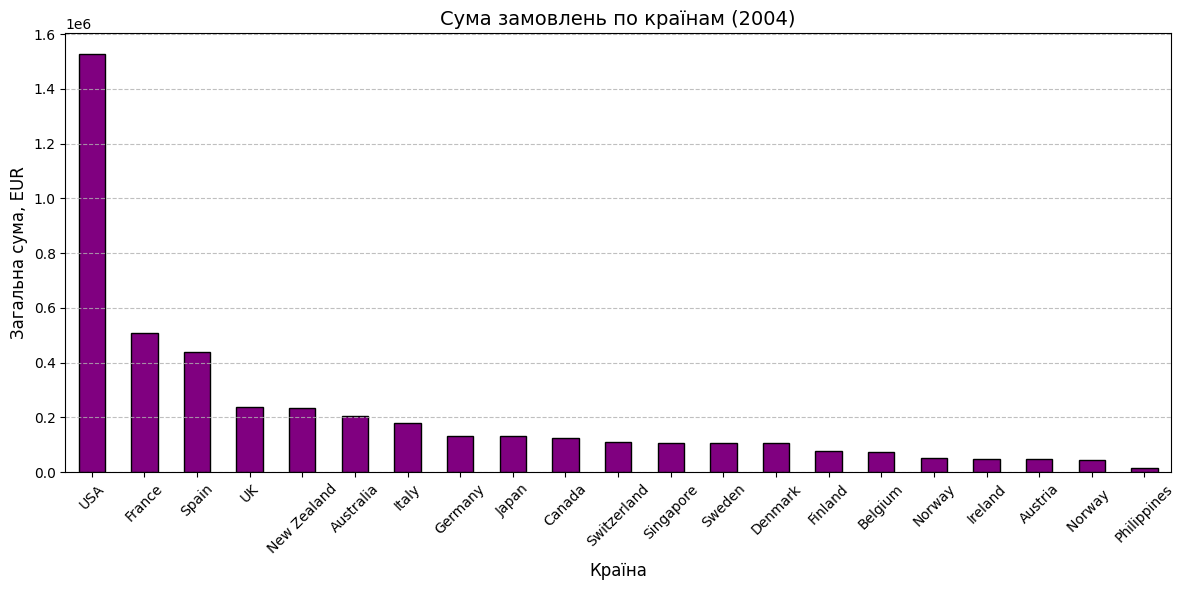

In [6]:
import matplotlib.pyplot as plt

country_stats = df_orders_2004.groupby('country')['TotalAmount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_stats.plot(kind='bar', color='purple', edgecolor='black')

plt.title('Сума замовлень по країнам (2004)', fontsize=14)
plt.xlabel('Країна', fontsize=12)
plt.ylabel('Загальна сума, EUR', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()

plt.show();

In [7]:
top_country = country_stats.idxmax()
top_value = country_stats.max()
print(top_country,top_value)

USA 1526499.65


In [8]:
country_totals = df_orders_2004.groupby('country')['TotalAmount'].sum()
top_country = country_totals.idxmax()
total_sum_in_country = country_totals.max()

df_top_country = df_orders_2004[df_orders_2004['country'] == top_country]

customer_totals = df_top_country.groupby('customerName')['TotalAmount'].sum()
top_customer_name = customer_totals.idxmax()
top_customer_value = customer_totals.max()

percentage = (top_customer_value / total_sum_in_country) * 100

In [9]:
print(f"Країна з найбільшою кількістю замовлень: {top_country}")
print(f"Клієнт, який зробив замовлень на найбільшу суму: {top_customer_name}")
print(f"Сума, на яку він зробив замовлень: €{top_customer_value:.2f}")
print(f"% від всіх замовлень в цій країні: {percentage:.2f}%")

Країна з найбільшою кількістю замовлень: USA
Клієнт, який зробив замовлень на найбільшу суму: Mini Gifts Distributors Ltd.
Сума, на яку він зробив замовлень: €231562.53
% від всіх замовлень в цій країні: 15.17%



### Завдання 3: Аналітичний запит - Топ продуктів по продажах (6 балів)

В цьому завданні ви отримуєте 1 бал за правильний SQL запит і по 1 балу за кожне завдання з Python.

**Проведіть аналіз прибутковості продуктів** та для цього дістаньте з БД інформацію з наступними полями:
- Назва продукту
- Лінійка продукту (productLine)
- Загальний дохід з цього продукту (сума quantity * priceEach)
- Ранг продукту по доходу (тобто яке місце посідає цей продукт за доходом серед усіх продуктів в нашому магазині)
- Який відсоток від загального доходу компанії складає цей продукт
- Різниця з середнім доходом по лінійці продукту (в %)

Відсортуйте дані за спаданням значень колонки "Який відсоток від загального доходу компанії складає цей продукт".

При створенні SQL запиту вам можуть стати в нагоді:
- **CTE** для розрахунку доходу по кожному продукту
- **Віконні функції** для ранжування та порівняння з середнім

Після отримання даних з БД проведіть обчислення (де треба) з Python та напишіть висновки:
1. Який відсоток від загального доходу складає ТОП1 продукт і що це за продукт?
2. Створіть стовпчикову діаграму топ-10 продуктів по доходу. В скільки разів відрізняється сумарний дохід за ТОП1 продуктом від 10го продукту за сумою доходу?
3. Створіть кругову діаграму розподілу доходу по лініях продуктів. Який відсоток від всіх продажів становлять продажі за ТОП2 лініями сумарно?
4. Розрахуйте та виведіть за принципом Парето (80/20) - скільки продуктів дають 80% доходу. Тобто нам треба знайти кількість продуктів сумарне значення "відсотку від загального доходу компанії", яких складає 80 починаючи з продукту з найбільшим цим відсотком.
5. Зробіть ще будь-яке аналітичне дослідження, яке дасть нам більше розуміння наших даних, що ми дістали в БД в цьому завданні. Сформоване питання до даних і обчислення має бути обовʼязково. Візуалізація - опціонально.

Візуалізацію можна створювати з будь-якою бібліотекою на ваш вибір.

In [10]:
query_3 = text("""
WITH ProductRevenue AS (
    SELECT 
        p.productName,
        p.productLine,
        SUM(od.quantityOrdered * od.priceEach) AS product_revenue
    FROM products p
    JOIN orderdetails od ON p.productCode = od.productCode
    GROUP BY p.productCode, p.productName, p.productLine
),
CompanyStats AS (
    SELECT SUM(product_revenue) AS total_company_revenue FROM ProductRevenue
)
SELECT pr.productName AS "Назва продукту", pr.productLine AS "Лінійка продукту",pr.product_revenue AS "Загальний дохід",
    RANK() OVER (ORDER BY pr.product_revenue DESC) AS "Ранг продукту",
    ROUND((pr.product_revenue / (SELECT total_company_revenue FROM CompanyStats)) * 100, 2) AS "Відсоток від загального доходу, (%)",
    ROUND(((pr.product_revenue / AVG(pr.product_revenue) OVER (PARTITION BY pr.productLine)) - 1) * 100, 2) AS "Різниця з середнім доходом по лінійці (%)"
FROM ProductRevenue pr
ORDER BY "Відсоток від загального доходу" DESC;
""")

df_profitability = pd.read_sql(query_3, con=engine)
df_profitability.head(10)

,Назва продукту,Лінійка продукту,Загальний дохід,Ранг продукту,"Відсоток від загального доходу, (%)",Різниця з середнім доходом по лінійці (%)
0,1992 Ferrari 360 Spider red,Classic Cars,276839.98,1,2.88,165.78
1,2001 Ferrari Enzo,Classic Cars,190755.86,2,1.99,83.14
2,1952 Alpine Renault 1300,Classic Cars,190017.96,3,1.98,82.43
3,1968 Ford Mustang,Classic Cars,161531.48,5,1.68,55.08
4,1969 Ford Falcon,Classic Cars,152543.02,6,1.59,46.45
5,1998 Chrysler Plymouth Prowler,Classic Cars,142530.63,8,1.48,36.84
6,1956 Porsche 356A Coupe,Classic Cars,134240.71,11,1.40,28.88
7,1969 Corvair Monza,Classic Cars,132363.79,12,1.38,27.08
8,1957 Corvette Convertible,Classic Cars,130749.31,14,1.36,25.53
9,1972 Alfa Romeo GTA,Classic Cars,127924.32,15,1.33,22.82


1. ТОП-1 продукт: 1992 Ferrari 360 Spider red cкладає 2.88% від загального доходу компанії.

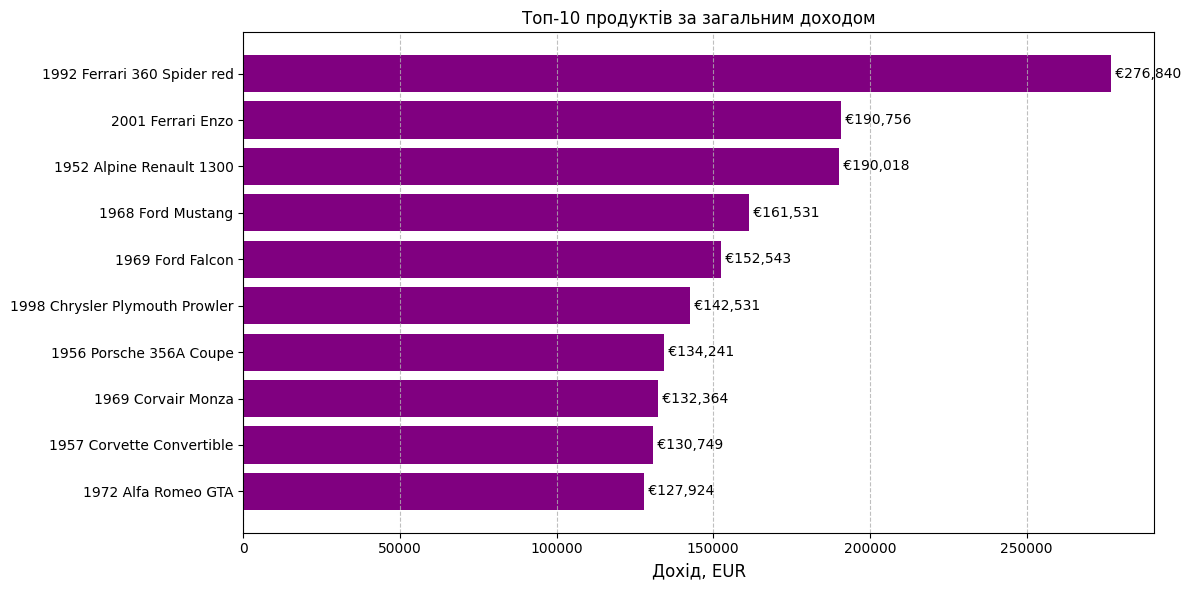

In [11]:
# 2. Горизонтальна стовпчиковa діаграмa топ-10 продуктів по доходу

top_10_products = df_profitability.head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_products['Назва продукту'][::-1], 
                top_10_products['Загальний дохід'][::-1], 
                color='purple')

plt.title('Топ-10 продуктів за загальним доходом', fontsize=12)
plt.xlabel('Дохід, EUR', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.8)

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,f' €{width:,.0f}', va='center')

plt.tight_layout()
plt.show();

In [12]:
# 2. В скільки разів відрізняється сумарний дохід за ТОП1 продуктом від 10го продукту за сумою доходу?
revenue_1 = df_profitability.iloc[0]['Загальний дохід']
revenue_10 = df_profitability.iloc[9]['Загальний дохід']
ratio = (revenue_1 / revenue_10).round(2)
print(ratio)

2.16


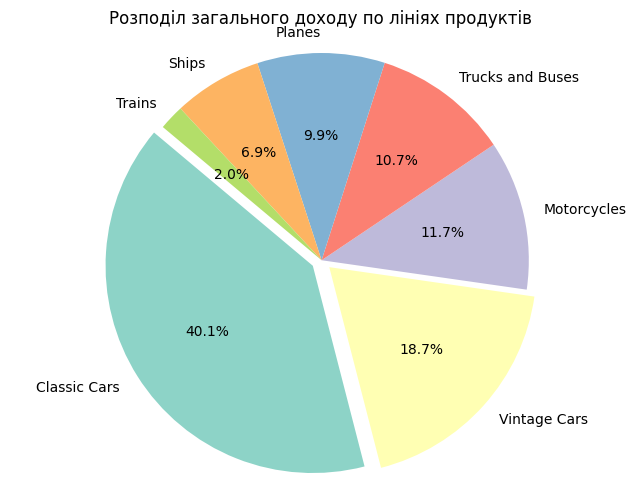

In [13]:
# 3. Kруговa діаграмa розподілу доходу по лініях продуктів

product_line_revenue = df_profitability.groupby('Лінійка продукту')['Загальний дохід'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.pie(product_line_revenue, 
        labels=product_line_revenue.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Set3.colors,
        explode=[0.05 if i < 2 else 0 for i in range(len(product_line_revenue))])

plt.title('Розподіл загального доходу по лініях продуктів', fontsize=12)
plt.axis('equal') 
plt.show();


In [14]:
# 3. Який відсоток від всіх продажів становлять продажі за ТОП2 лініями сумарно?
total_revenue = product_line_revenue.sum()
top_2_revenue = product_line_revenue.head(2).sum()
top_2_percentage = ((top_2_revenue / total_revenue) * 100).round(2)
print(top_2_percentage)

58.84


In [15]:
# 4. Розрахуйте та виведіть за принципом Парето (80/20) - скільки продуктів дають 80% доходу. 
df_profitability['Kумулятивний відсоток'] = df_profitability['Відсоток від загального доходу, (%)'].cumsum()
pareto_products = df_profitability[df_profitability['Kумулятивний відсоток'] <= 80]

total_products = len(df_profitability)
num_pareto_products = len(pareto_products)

print(f"Загальна кількість продуктів у магазині: {total_products}")
print(f"Кількість продуктів, що формують 80% доходу: {num_pareto_products}")

Загальна кількість продуктів у магазині: 109
Кількість продуктів, що формують 80% доходу: 82


In [16]:
catalogue_percentage = round((num_pareto_products / total_products) * 100,2)
print(catalogue_percentage)

75.23


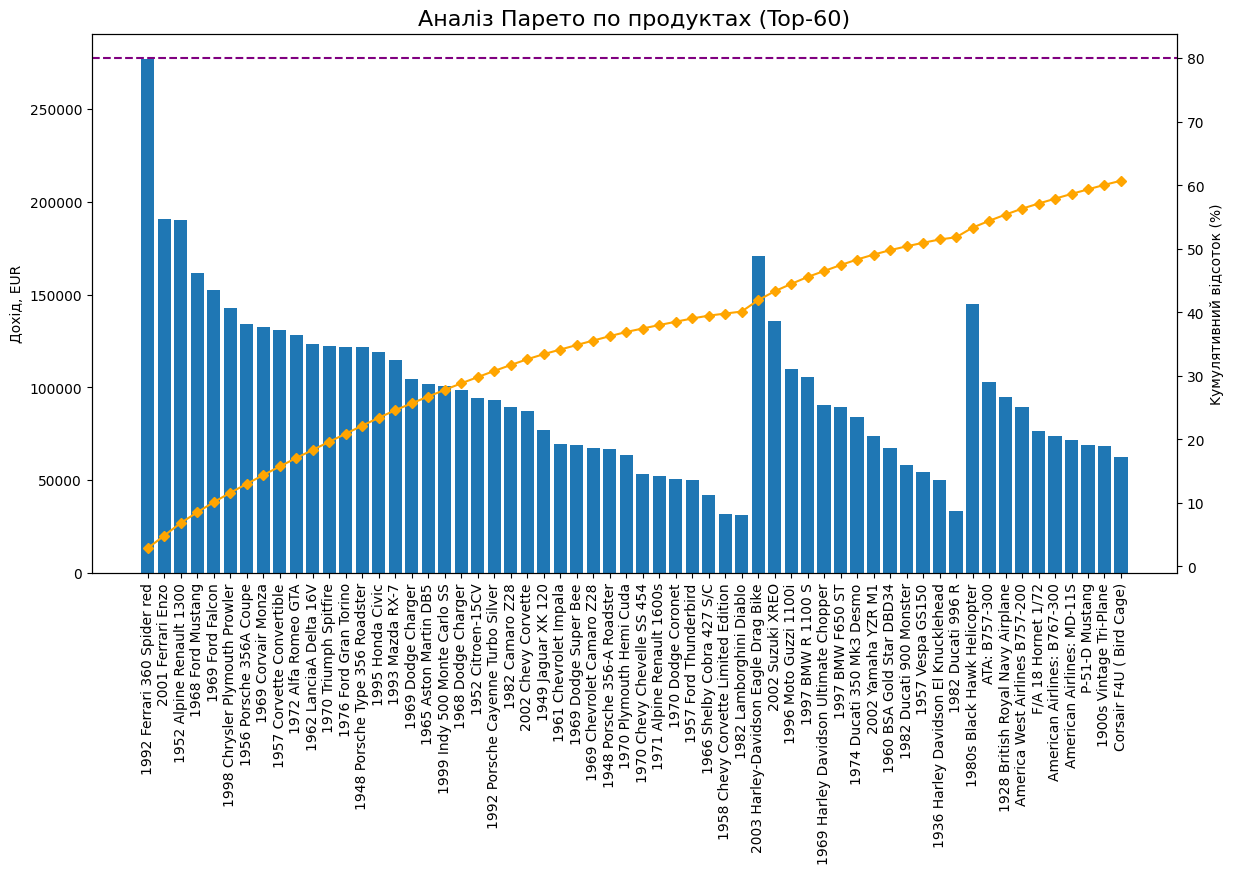

In [17]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.bar(df_profitability['Назва продукту'][:60], df_profitability['Загальний дохід'][:60])
ax1.set_ylabel('Дохід, EUR')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(df_profitability['Назва продукту'][:60], df_profitability['Kумулятивний відсоток'][:60], color='orange', marker='D', ms=5)
ax2.axhline(80, color='purple', linestyle='--', label='Межа 80%')
ax2.set_ylabel('Kумулятивний відсоток (%)')

plt.title('Аналіз Парето по продуктах (Top-60)', fontsize=16)
plt.show();

In [18]:
# 5.1. Які 20 товарів мають найменший запас на складі і скільки раз їх замовляли?
query_4 = text("""
SELECT 
    p.productName,
    p.quantityInStock,
    COUNT(od.orderNumber) AS timesOrdered
FROM products p
LEFT JOIN orderdetails od ON p.productCode = od.productCode
GROUP BY  p.productCode,p.productName
ORDER BY p.quantityInStock ASC
LIMIT 20
""")

df_low_stock = pd.read_sql(query_4, con=engine)
df_low_stock

,productName,quantityInStock,timesOrdered
0,1960 BSA Gold Star DBD34,15,28
1,1968 Ford Mustang,68,27
2,1928 Ford Phaeton Deluxe,136,28
3,1997 BMW F650 ST,178,28
4,Pont Yacht,414,27
5,1911 Ford Town Car,540,25
6,1928 Mercedes-Benz SSK,548,28
7,F/A 18 Hornet 1/72,551,28
8,2002 Yamaha YZR M1,600,27
9,The Mayflower,737,27


Продукт 1960 BSA Gold Star DBD34 є в наявності 15 одиниць(найменший сток) - кількість замовлень становить 28, варто звернути увагу на поповнення стоку.

In [20]:
# 5.2. Яка Product Line є найпопулярнішою серед покупців за кількістю проданих одиниць?

params = {"limit_n": 7}

query_5 = text("""
    SELECT 
        p.productLine,
        SUM(od.quantityOrdered) AS total_quantity,
        COUNT(DISTINCT o.orderNumber) AS unique_orders_count
    FROM products p
    JOIN orderdetails od ON p.productCode = od.productCode
    JOIN orders o ON od.orderNumber = o.orderNumber
    GROUP BY p.productLine
    ORDER BY total_quantity DESC
    LIMIT :limit_n;
""")

df_popularity = pd.read_sql(query_5, con=engine, params=params)

df_popularity['avg_items_per_order'] = df_popularity['total_quantity'] / df_popularity['unique_orders_count']
df_popularity

,productLine,total_quantity,unique_orders_count,avg_items_per_order
0,Classic Cars,35582.0,209,170.248804
1,Vintage Cars,22933.0,187,122.636364
2,Motorcycles,12778.0,79,161.746835
3,Planes,11872.0,66,179.878788
4,Trucks and Buses,11001.0,75,146.680000
5,Ships,8532.0,68,125.470588
6,Trains,2818.0,47,59.957447


Продуктова ліня Classic Cars лідирує як по кількoсті замовлень так і по доходу (кругова діаграма).

### ОПЦІОНАЛЬНО. Завдання 4: Аналітичний запит - Динаміка продажів по місяцях (8 балів)

**Проведіть аналіз динаміки продажів по місяцях** та для цього дістаньте з бази інформацію з наступними полями:
- Рік та місяць замовлень
- Кількість замовлень за цей рік-місяць
- Загальний дохід (quantityOrdered * priceEach) за цей рік-місяць
- На який % ми зросли за доходом порівняно з попереднім місяцем
- Накопичувальний дохід до цього місяця за рік
- Ковзне середнє доходу за 3 місяці
- Ранг цього місяця за доходом

Використайте:
- **CTE** для агрегації продажів по місяцях
- **Віконні функції** для розрахунку:
  - Зростання доходу порівняно з попереднім місяцем (LAG)
  - Накопичувальний дохід за рік
  - Ковзне середнє доходу за 3 місяці (AVG OVER)
  - Ранжування місяців за доходом (RANK)

Після отримання даних з БД побудуйте наступні графіки і напишіть коротко, які висновки з них можна зробити.
1. Створіть лінійний графік доходу по місяцях. Чи є тред до зростання в даних?
2. Створіть графік місяць-до-місяця зростання у відсотках.
3. Створіть heatmap сезонності (місяць vs рік)
4. Відобразіть козвне середнє разом з динамікою продажів.
5. Розрахуйте кореляцію між кількістю замовлень та середнім чеком та побудуйте графік розсіювання між цими змінними. Чи є лінійна залежність?

Очікуваний результат кожного графіку - нижче.
В першому графіку я додала лінію тренду аби показати тренд. Вам її додавати не треба.


In [21]:
query_6 = text("""
WITH MonthlySales AS (
    SELECT 
        YEAR(o.orderDate) AS sales_year,
        DATE_FORMAT(o.orderDate, '%Y-%m') AS month_year,
        COUNT(DISTINCT o.orderNumber) AS order_count,
        SUM(od.quantityOrdered * od.priceEach) AS monthly_revenue
    FROM orders o
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
    GROUP BY sales_year, month_year
)
SELECT 
    month_year AS "Рік-Місяць",
    order_count AS "Кількість замовлень",
    monthly_revenue AS "Дохід за цей рік-місяць",
    
    ((monthly_revenue / LAG(monthly_revenue) OVER (ORDER BY month_year)) - 1) * 100 AS "Ріст до минулого місяця (%)",
    SUM(monthly_revenue) OVER (PARTITION BY sales_year ORDER BY month_year) AS "Накопичувальний дохід (рік)",
    AVG(monthly_revenue) OVER (ORDER BY month_year ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS "Ковзне середнє за 3 місяці",
    RANK() OVER (ORDER BY monthly_revenue DESC) AS "Ранг доходу"
FROM MonthlySales
ORDER BY month_year;
""")

df_time_analysis = pd.read_sql(query_6, con=engine)
df_time_analysis.head(5)

,Рік-Місяць,Кількість замовлень,Дохід за цей рік-місяць,Ріст до минулого місяця (%),Накопичувальний дохід (рік),Ковзне середнє за 3 місяці,Ранг доходу
0,2003-01,5,116692.77,NaN,116692.77,116692.770000,29
1,2003-02,3,128403.64,10.035643,245096.41,122548.205000,28
2,2003-03,6,160517.14,25.009805,405613.55,135204.516667,26
3,2003-04,7,185848.59,15.781150,591462.14,158256.456667,23
4,2003-05,6,179435.55,-3.450680,770897.69,175267.093333,24


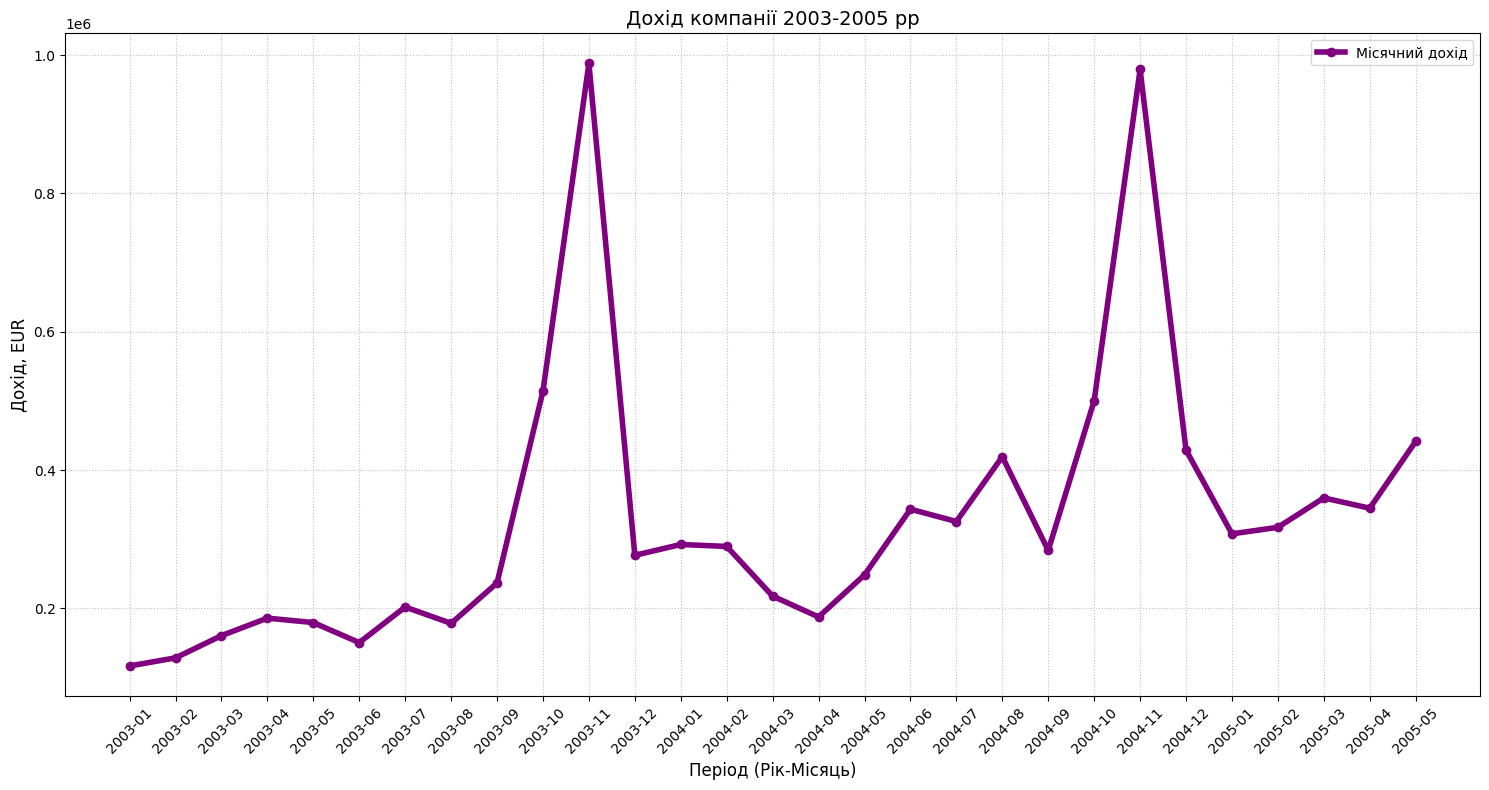

In [22]:
# 1. Створіть лінійний графік доходу по місяцях. Чи є тренд до зростання в даних?

plt.figure(figsize=(15, 8))

plt.plot(df_time_analysis['Рік-Місяць'], df_time_analysis['Дохід за цей рік-місяць'], 
         marker='o', linestyle='-', color='purple', label='Місячний дохід', linewidth=4)

plt.title('Дохід компанії 2003-2005 pp', fontsize=14)
plt.xlabel('Період (Рік-Місяць)', fontsize=12)
plt.ylabel('Дохід, EUR', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle=':', alpha=0.8)
plt.legend()

plt.tight_layout()
plt.show();

Загалом тренд доходів з 2003 року до майже середини 2005 року спрямований вгору. Є певна циклічність - спад на початку року (січень-лютий) і зростання в кінці року (жовтень-листопад).

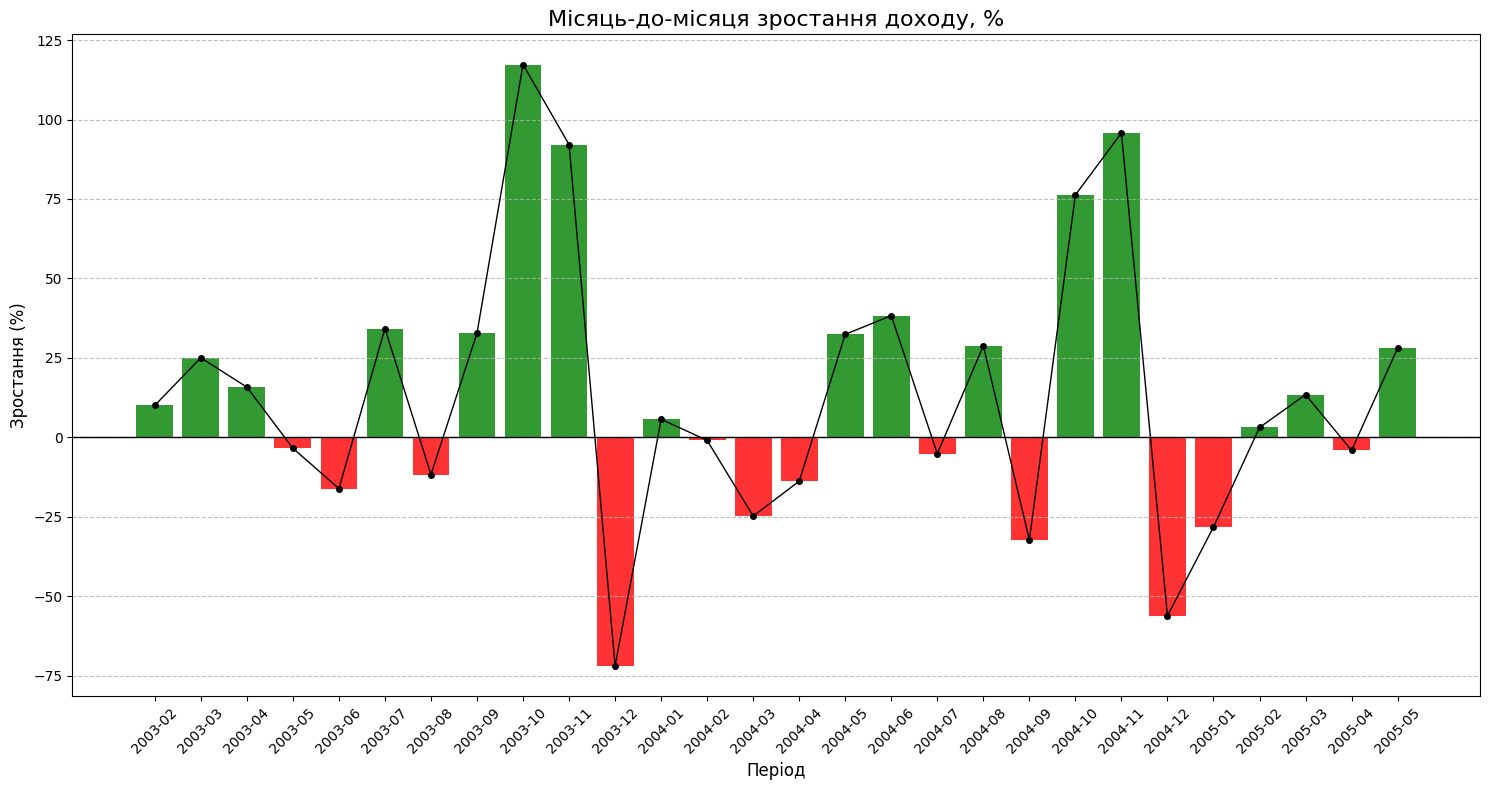

In [23]:
# 2. Створіть графік місяць-до-місяця зростання у відсотках.

df_growth = df_time_analysis.dropna(subset=['Ріст до минулого місяця (%)'])

plt.figure(figsize=(15, 8))
colors = ['green' if x > 0 else 'red' for x in df_growth['Ріст до минулого місяця (%)']]
plt.bar(df_growth['Рік-Місяць'], df_growth['Ріст до минулого місяця (%)'], color=colors, alpha=0.8)

plt.plot(df_growth['Рік-Місяць'], df_growth['Ріст до минулого місяця (%)'], color='black', marker='o', linewidth=1, markersize=4)
plt.axhline(0, color='black', linewidth=1, linestyle='-')


plt.title('Місяць-до-місяця зростання доходу, %', fontsize=16)
plt.xlabel('Період', fontsize=12)
plt.ylabel('Зростання (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show();

Присутні сезонні стрибки (ріст - жовтень - листопад, спад різкий - грудень) і досить великі коливання (позитивні значення і негативні). 

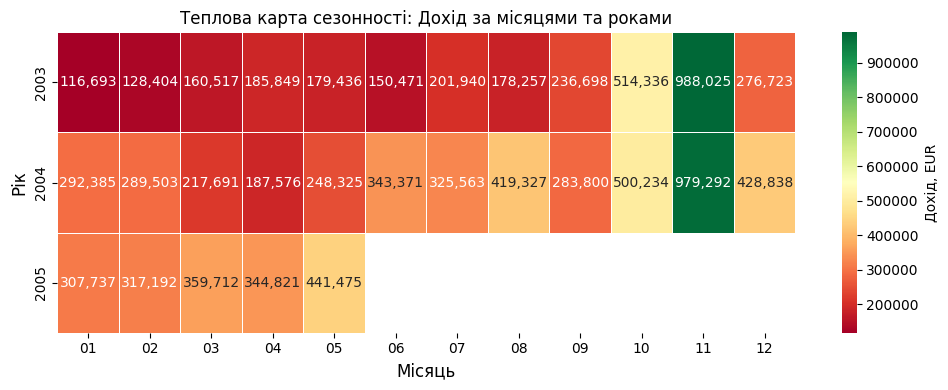

In [24]:
# 3. Створіть heatmap сезонності (місяць vs рік)

import seaborn as sns
df_time_analysis['Рік'] = df_time_analysis['Рік-Місяць'].str.split('-').str[0]
df_time_analysis['Місяць'] = df_time_analysis['Рік-Місяць'].str.split('-').str[1]

pivot_df = df_time_analysis.pivot(index='Рік', columns='Місяць', values='Дохід за цей рік-місяць')


plt.figure(figsize=(10, 4))
sns.heatmap(pivot_df, annot=True,fmt=",.0f",cmap="RdYlGn",linewidths=.5,cbar_kws={'label': 'Дохід, EUR'})

plt.title('Теплова карта сезонності: Дохід за місяцями та роками', fontsize=12)
plt.xlabel('Місяць', fontsize=12)
plt.ylabel('Рік', fontsize=12)

plt.tight_layout()
plt.show();

Темно зелений колір - це основний період для бізнесу, темно-червоні - менш активні періоди для бізнесу. Також бачимо, що з кожним роком дохід компанії зростає - колір змінюється на світліший.

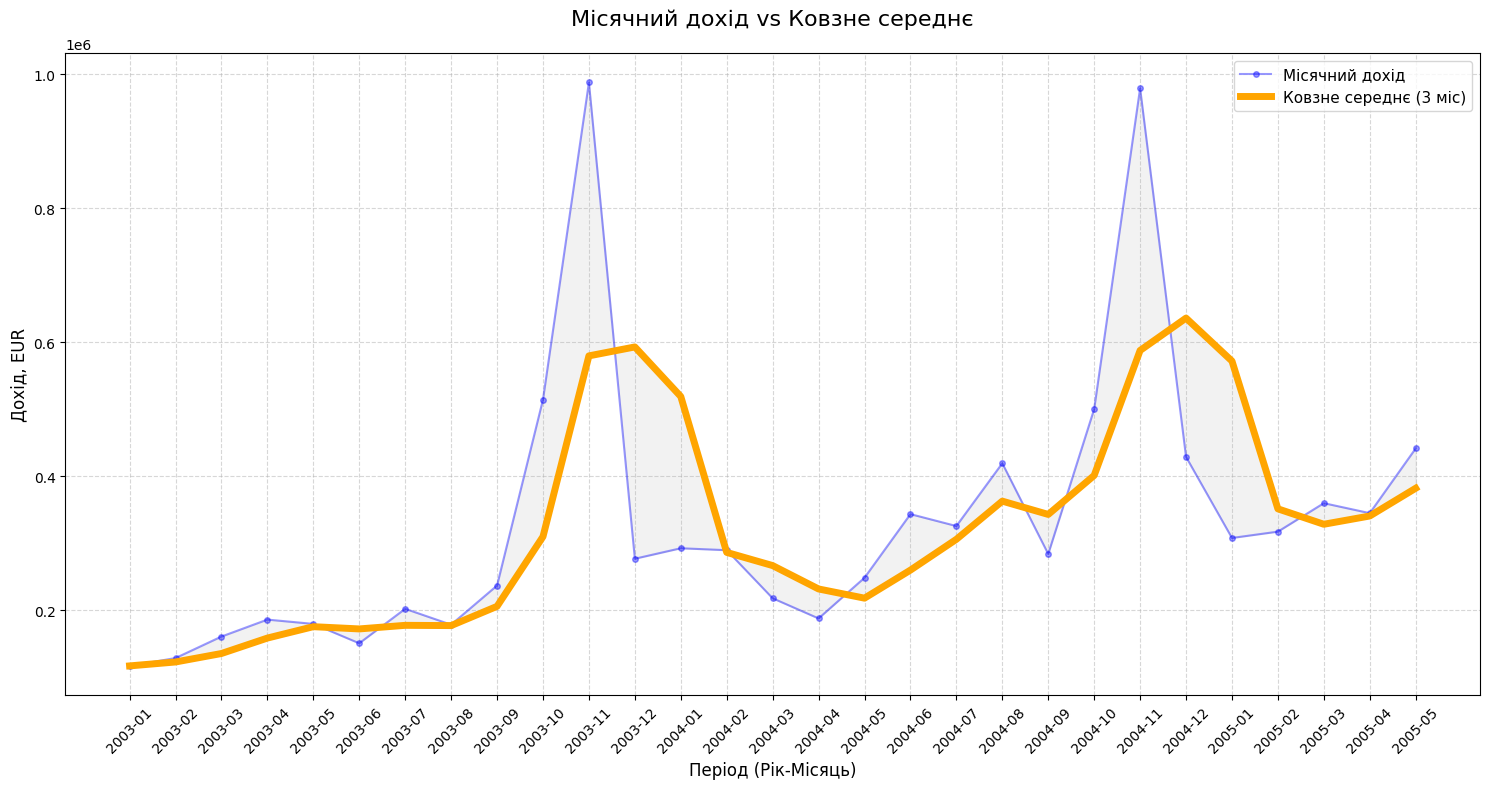

In [25]:
# 4. Відобразіть козвне середнє разом з динамікою продажів.

plt.figure(figsize=(15, 8))

plt.plot(df_time_analysis['Рік-Місяць'], df_time_analysis['Дохід за цей рік-місяць'], 
         marker='o', markersize=4, linestyle='-', color='blue', 
         alpha=0.4, label='Місячний дохід')

plt.plot(df_time_analysis['Рік-Місяць'], df_time_analysis['Ковзне середнє за 3 місяці'], 
         linestyle='-', color='orange', linewidth=5, 
         label='Ковзне середнє (3 міс)')

plt.fill_between(df_time_analysis['Рік-Місяць'], 
                 df_time_analysis['Дохід за цей рік-місяць'], 
                 df_time_analysis['Ковзне середнє за 3 місяці'], 
                 color='gray', alpha=0.1)


plt.title('Місячний дохід vs Ковзне середнє', fontsize=16, pad=20)
plt.xlabel('Період (Рік-Місяць)', fontsize=12)
plt.ylabel('Дохід, EUR', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=11)

plt.tight_layout()
plt.show();

Ковзне середнє згладжує сезонні стрибки і стабільно піднімається вгору, тобто це свідчить про те, що бізнес загалом зростає.

In [26]:
# 5. Розрахуйте кореляцію між кількістю замовлень та середнім чеком та побудуйте графік розсіювання між цими змінними.
df_time_analysis['Середній чек'] = df_time_analysis['Дохід за цей рік-місяць'] / df_time_analysis['Кількість замовлень']
correlation = df_time_analysis['Кількість замовлень'].corr(df_time_analysis['Середній чек']).round(4)
print(correlation)

0.0174


Лінійна залежність практично відсутня.

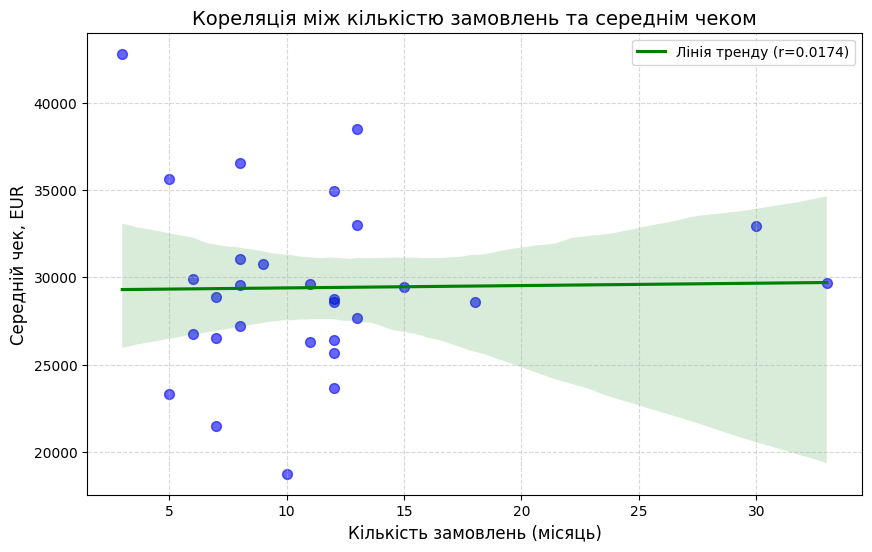

In [27]:
plt.figure(figsize=(10, 6))

sns.regplot(data=df_time_analysis, 
            x='Кількість замовлень', 
            y='Середній чек', 
            scatter_kws={'s': 50, 'alpha': 0.6, 'color': 'blue'},
            line_kws={'color': 'green', 'label': f'Лінія тренду (r={correlation:.4f})'})

plt.title('Кореляція між кількістю замовлень та середнім чеком', fontsize=14)
plt.xlabel('Кількість замовлень (місяць)', fontsize=12)
plt.ylabel('Середній чек, EUR', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show();

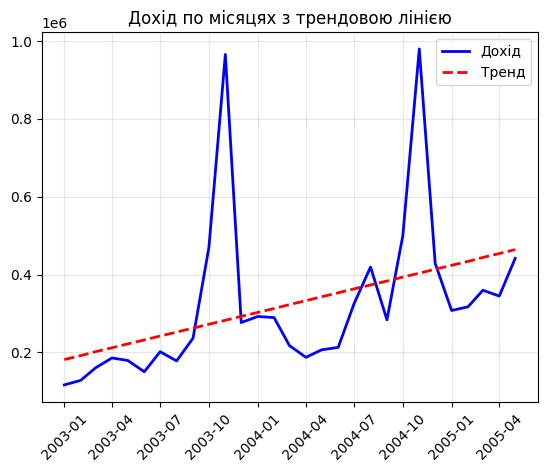

In [ ]:
# 1. Лінійний графік доходу з трендом (аби показати, що тренд є)


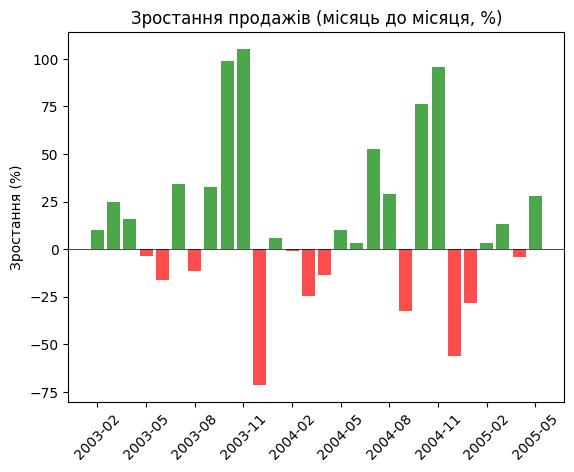

In [ ]:
# 2. Місяць-до-місяця зростання


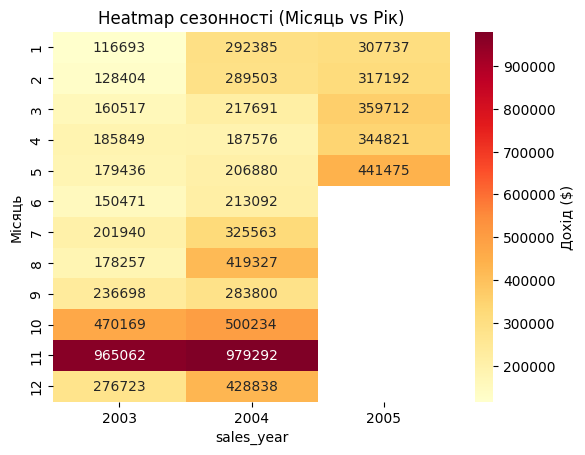

In [ ]:
# 3. Heatmap сезонності


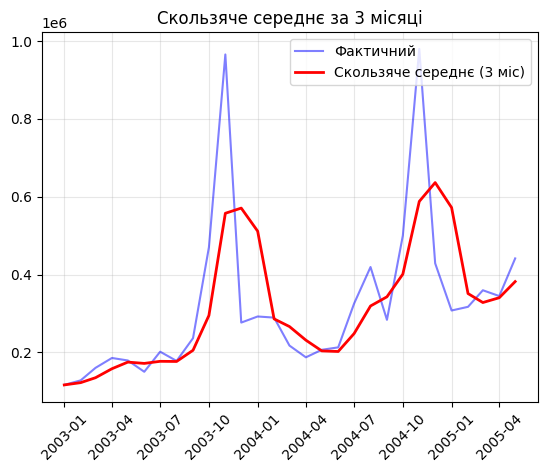

In [ ]:
# 4. Ковзне середнє з динімікою доходу


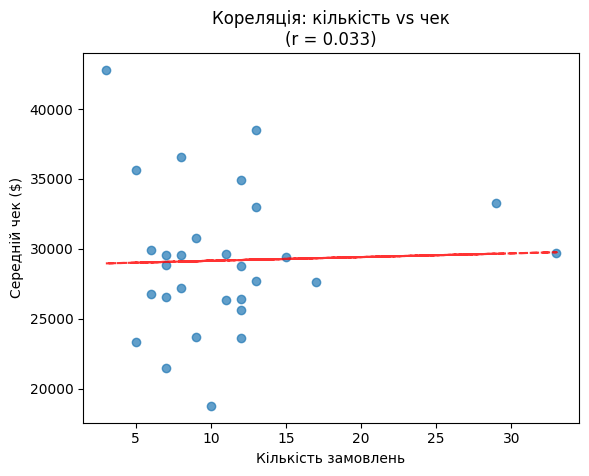

In [ ]:
# 5. Кореляція замовлень та середнього чеку


Є аутлаєри, але в загальному не можна сказати, що кореляція присутня.